# Quantum Computer lab 4

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* Please run the code to make sure it works, then try the questions.
* The idea is to explore the influence on noise on circuits



## Background to quantum noise

*  Overview of quantum noise from Amazon  https://aws.amazon.com/blogs/quantum-computing/noise-in-quantum-computing/
*  

##  Installing pennylane on the University machines and your laptop

There are instructions on how to install pennylane on your computer at: https://pennylane.ai/install/

In the annaconda prompt or terminal on a Mac type 

pip install pennylane --upgrade

If you have spyder running you may need to restart spyder to access the library.

You will have to run this command everytime you work on a new PC in the lab.

There may be  additional complications with the University PCs,because of administrative rights. 







##  Classsical noise  (Coherent noise)

Examples taken from 

In [10]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev1 = qml.device("default.qubit", wires=1)

@qml.qnode(dev1)
def nonoise_circuit():
    rand_angle = 0.0
    # np.random.rand() uniformly samples from [0, 1)
    qml.RX(rand_angle, wires=0)
    return qml.expval(qml.PauliZ(0))



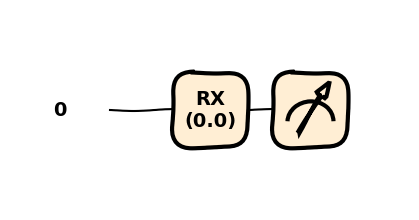

In [11]:
qnode = qml.QNode(nonoise_circuit, dev1)
qml.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()

In [12]:
print(nonoise_circuit())

1.0


expval takes the expectation value

$$  <0 | \sigma_z | 0 > = 1 $$

This agrees with the simulation

## Introduce some noise

One way to introduce noise is to add a random rotation to the circuit.

The definition of the Rx gate is from https://docs.pennylane.ai/en/stable/code/api/pennylane.RX.html

See the circuit below

RX(rand_angle) is the random noise.

$$
R_x(\phi) = e^{-i\phi\sigma_x/2} = \begin{bmatrix}
                \cos(\phi/2) & -i\sin(\phi/2) \\
                -i\sin(\phi/2) & \cos(\phi/2)
            \end{bmatrix}.
$$


In [13]:
import pennylane as qml
from pennylane import numpy as np

dev1 = qml.device("default.qubit", wires=1)

@qml.qnode(dev1)
def rot_circuit(prec):
    rand_angle = np.pi + prec*np.random.rand()
    # np.random.rand() uniformly samples from [0, 1)
    qml.RX(rand_angle, wires=0)
    return qml.expval(qml.PauliZ(0))

## evaluate the circuit 

In [16]:
print(rot_circuit(4))
print(rot_circuit(0.1))


-0.5378565486369811
-0.9988046794850223


In [ ]:
## add some quantum noise

The BitFlip operator randomly flips the qubit


In [23]:
dev2 = qml.device('default.mixed', wires=1)
@qml.qnode(dev2)
def bitflip_circuit(p):
    qml.BitFlip(p, wires=0)
    return qml.expval(qml.PauliZ(0))


In [24]:
for p in [ 0, 0.1 , 0.99] :
   print("Prob of flip ", p, bitflip_circuit(p))

Prob of flip  0 0.9999999999999998
Prob of flip  0.1 0.8
Prob of flip  0.99 -0.98


##  Quantum noise 

Examples taken from https://pennylane.ai/qml/demos/tutorial_noisy_circuits



In [18]:
import pennylane as qml
from jax import numpy as np
import jax

dev = qml.device('default.mixed', wires=2)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


print(f"QNode output = {circuit():.4f}")

QNode output = 1.0000


## Compute the density matrix

The density matrix is a critical object to evaluate quantum noise.

The circuit below creates the state from the input $ |00> $

$$
|\psi > = \frac{1}{\sqrt{2}} ( |00> + |11> )
$$


In [20]:
@qml.qnode(dev)
def density_matrix_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

matrix = density_matrix_circuit()
print(f"Output density matrix is = \n{np.real(matrix)}")

Output density matrix is = 
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


Question

Can you derive the density matrix from the state.
$$
|\psi > = \frac{1}{\sqrt{2}} ( |00> + |11> )
$$



## Quantum noise

In [6]:
dev2 = qml.device('default.mixed', wires=1)

In [7]:
@qml.qnode(dev2)
def bitflip_circuit(p):
    qml.BitFlip(p, wires=0)
    return qml.expval(qml.PauliZ(0))

In [10]:
print(bitflip_circuit(0.0))
print(bitflip_circuit(0.01))
print(bitflip_circuit(0.99))

0.9999999999999998
0.98
-0.98


## Qiskit

In [12]:
#  https://discuss.pennylane.ai/t/qml-device-error-with-qiskit-aer/4556/6
# update from https://qiskit.github.io/qiskit-aer/tutorials/3_building_noise_models.html

from qiskit_ibm_runtime.fake_provider import FakeSantiago

In [17]:
import qiskit_aer
import qiskit_aer.noise 

In [19]:
import qiskit
#import qiskit.providers.aer.noise as noise  #  error

# create a bit flip error with probability p = 0.01
p = 0.01
my_bitflip = qiskit_aer.noise.pauli_error([('X', p), ('I', 1 - p)])

# create an empty noise model
my_noise_model = qiskit_aer.noise.NoiseModel()

# attach the error to the hadamard gate 'h'
my_noise_model.add_quantum_error(my_bitflip, ['h'], [0])

dev4 = qml.device('qiskit.aer', wires=1, noise_model = my_noise_model)

@qml.qnode(dev4)
def bitflip_circuit_aer():
    qml.Hadamard(0)
    return qml.expval(qml.PauliZ(0))

In [20]:
print(bitflip_circuit_aer())

0.025390625
